In [500]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


In [501]:
# import csv and convert to dataframe.

imbd_raw = pd.read_csv('imdb_labelled.txt', sep="\t", header=None)
imbd_raw.columns = [ "review_text",'senti_score']
imbd_raw.head()

,review_text,senti_score
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [502]:
# assign a group number to each row 

p=0
groupnum = []
for i in range( len(imbd_raw)): 
    groupnum.append(p)
    if p<5:
        p+=1
    else:
        p=0

imbd_raw['group_number']=groupnum
imbd_raw.head()

,review_text,senti_score,group_number
0,"A very, very, very slow-moving, aimless movie ...",0,0
1,Not sure who was more lost - the flat characte...,0,1
2,Attempting artiness with black & white and cle...,0,2
3,Very little music or anything to speak of.,0,3
4,The best scene in the movie was when Gerardo i...,1,4


In [503]:
#create two lists one containing negative reveiws and the other positive 
m = imbd_raw['senti_score']!= 0
a, b = imbd_raw[m], imbd_raw[~m]


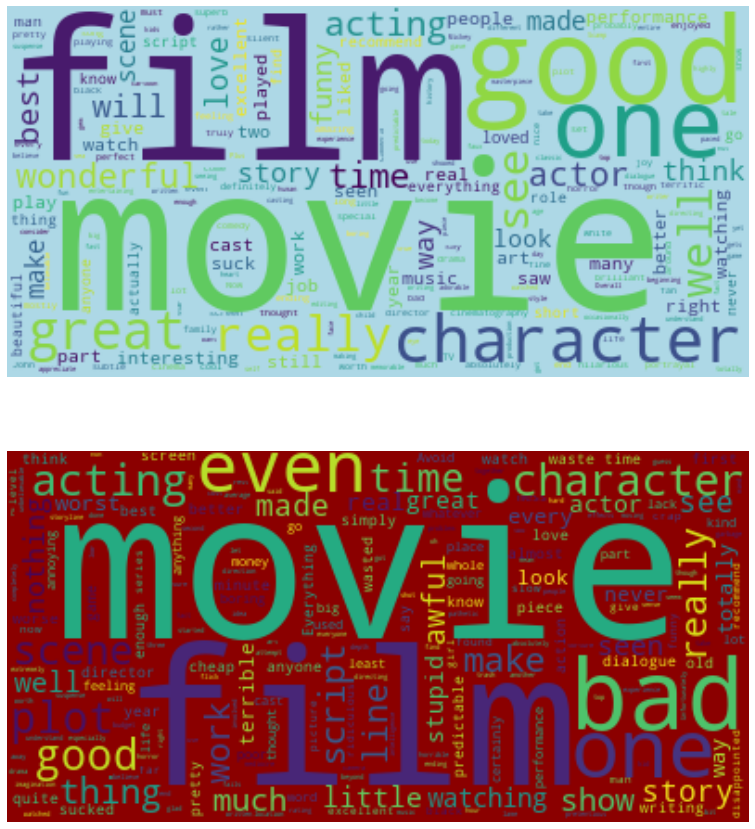

In [504]:


from wordcloud import WordCloud

# Generate a word cloud image from the two lists

plt.subplot    

wordcloudbad = WordCloud(background_color="darkred").generate(" ".join(b['review_text']))

wordcloudgood = WordCloud(background_color="lightblue").generate(" ".join(a['review_text']))

plt.figure(figsize=(15,15))
# Display the generated image:
plt.subplot(2,1,1)
plt.imshow(wordcloudgood, interpolation='bilinear')
plt.axis("off")
wordcloudbad
plt.subplot(2,1,2)
plt.imshow(wordcloudbad, interpolation='bilinear')
plt.axis("off")

plt.show()

terrible lack disapointed predictable cheap poor

Begin making the Classifiers

In [ ]:
good one great really beautiful pretty performance love nice funny terrific enjoyed interesting art

## First Classifier

In [512]:
Keywords to use for the
keywords1 = ['bad']

group1 = pd.DataFrame(imbd_raw.loc[imbd_raw['group_number']!= 0])


for key in keywords1:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    group1[str(key)] = group1.review_text.str.contains(
        ' ' + str(key) + ' ',
        case=False)
 



In [513]:
group1['allcaps'] = group1.review_text.str.isupper()
group1['senti_score'] = (group1['senti_score'] == 0)
group1.head()


,review_text,senti_score,group_number,bad,allcaps
1,Not sure who was more lost - the flat characte...,True,1,False,False
2,Attempting artiness with black & white and cle...,True,2,False,False
3,Very little music or anything to speak of.,True,3,False,False
4,The best scene in the movie was when Gerardo i...,False,4,False,False
5,"The rest of the movie lacks art, charm, meanin...",True,5,False,False


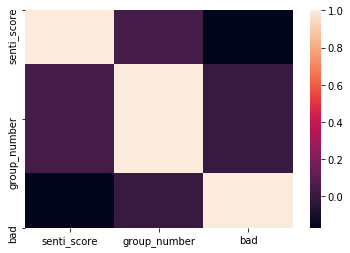

In [514]:
sns.heatmap(imbd_raw.corr())

In [515]:
data1 = group1[keywords1 + ['allcaps']]
target1 = group1['senti_score']

In [517]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
#other classifiers
#MultinomialNB
#ComplementNB
#CategoricalNB 
#GaussianNB

from sklearn.naive_bayes import BernoulliNB 

# Instantiate our model and store it in a new variable.
bnb1 = BernoulliNB()

# Fit our model to the data.
bnb1.fit(data1, target1)

# Classify, storing the result in a new variable.
y_pred1 = bnb1.predict(data1)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data1.shape[0],
    (target1 != y_pred1).sum()
))
print("{}%".format( 100*((target1 != y_pred1).sum()/data1.shape[0])
))


Number of mislabeled points out of a total 623 points : 280
44.9438202247191%


In [518]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb1, data1, target1, cv=10)

array([0.52380952, 0.55555556, 0.55555556, 0.57142857, 0.58064516,
       0.53225806, 0.53225806, 0.53225806, 0.53225806, 0.57377049])

In [519]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target1, y_pred1)

array([[319,   5],
       [275,  24]])

this classifier is quite bad its accuracy was only about mid low 50th percentile not surprising because it only had one feature 

## 2nd Classifier 

In [526]:
#group 2 data 
group2 = pd.DataFrame(imbd_raw.loc[imbd_raw['group_number']!= 1])


keywords2 = ['bad', 'horrible','nothing','waste',
            'wasted', 'NOTHING','walked out','bored','embarrassing',
           'worst','terrible','cheap', ]

for key in keywords2:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    group2[str(key)] = group2.review_text.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
group2['allcaps'] = group2.review_text.str.isupper()
group2['senti_score'] = (group2['senti_score'] == 0)

data2 = group2[keywords2 + ['allcaps']]
target2 = group2['senti_score']



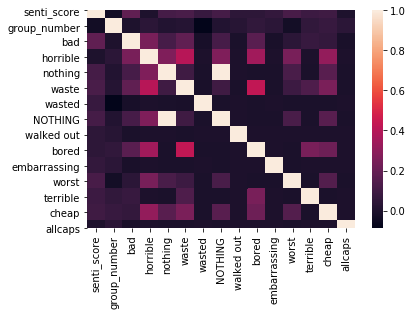

In [527]:
sns.heatmap(group2.corr())


In [531]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import GaussianNB 

# Instantiate our model and store it in a new variable.


bnb2 = GaussianNB()

# Fit our model to the data.
bnb2.fit(data2, target2)

# Classify, storing the result in a new variable.
y_pred2 = bnb2.predict(data2)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data2.shape[0],
    (target2 != y_pred2).sum()
))

Number of mislabeled points out of a total 623 points : 259


In [532]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.53968254, 0.6031746 , 0.58730159, 0.61904762, 0.61904762,
       0.56451613, 0.64516129, 0.62903226, 0.59016393, 0.68852459])

In [533]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[324,   4],
       [235,  60]])

I thought this one would be better but apparently not it still misslabled with the larger number of features 

## 3rd Classifier 

In [540]:

#group 2 data 
group3 = pd.DataFrame(imbd_raw.loc[imbd_raw['group_number']!= 2])


keywords3 = ['bad', 'horrible','nothing','waste',
            'wasted', 'nothing','walked out','bored','embarrassing',
           'worst','bad', 'cheap', 'terrible', 'lack', 'disappointed', 'predictable', 'cheap', 'poor']


In [541]:

for key in keywords3:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    group3[str(key)] = group3.review_text.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
group3['allcaps'] = group3.review_text.str.isupper()
group3['senti_score'] = (group3['senti_score'] == 0)

data = group3[keywords3 + ['allcaps']]
target = group3['senti_score']

group3.head()

,review_text,senti_score,group_number,bad,horrible,nothing,waste,wasted,walked out,bored,embarrassing,worst,cheap,terrible,lack,disappointed,predictable,poor,allcaps
0,"A very, very, very slow-moving, aimless movie ...",True,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,Not sure who was more lost - the flat characte...,True,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,Very little music or anything to speak of.,True,3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,The best scene in the movie was when Gerardo i...,False,4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,"The rest of the movie lacks art, charm, meanin...",True,5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


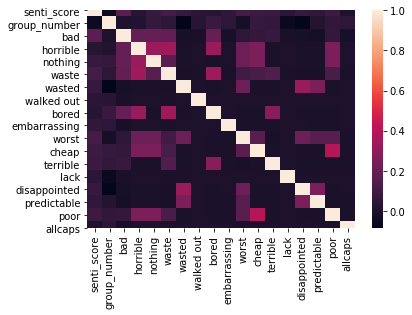

In [542]:
sns.heatmap(group3.corr())


In [543]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
#other classifiers
#MultinomialNB
#ComplementNB
#CategoricalNB 
#GaussianNB
from sklearn.naive_bayes import BernoulliNB 

# Instantiate our model and store it in a new variable.


bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 623 points : 242


In [544]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.53125   , 0.58730159, 0.56451613, 0.61290323, 0.62903226,
       0.58064516, 0.64516129, 0.62903226, 0.58064516, 0.64516129])

In [545]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[317,   5],
       [237,  64]])

not much betterwith the next one Ill try to seperate the good ones out 

## 4th Classifier 

In [486]:
#group 2 data 

group4 = pd.DataFrame(imbd_raw.loc[imbd_raw['group_number']!= 3])


keywords4 = ['good', 'one', 'great', 'really', 'beautiful', 'pretty', 'performance',
             'love', 'nice', 'funny', 'terrific', 'enjoyed', 'interesting', 'art']

In [561]:

for key in keywords4:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    group4[str(key)] = group4.review_text.str.contains(
        ' ' + str(key) + ' ',
        case=True
    )
group4['allcaps'] = group4.review_text.str.isupper()
group4['senti_score'] = (group4['senti_score'] == 1)

data4 = group4[keywords4 + ['allcaps']]
target4 = group4['senti_score']

group4.head()

,review_text,senti_score,group_number,bad,horrible,nothing,waste,wasted,NOTHING,walked out,bored,embarrassing,worst,terrible,cheap,allcaps
0,"A very, very, very slow-moving, aimless movie ...",False,0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,Not sure who was more lost - the flat characte...,False,1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,Attempting artiness with black & white and cle...,False,2,False,False,False,False,False,False,False,False,False,False,False,False,False
4,The best scene in the movie was when Gerardo i...,True,4,False,False,False,False,False,False,False,False,False,False,False,False,False
5,"The rest of the movie lacks art, charm, meanin...",False,5,False,False,False,False,False,False,False,False,False,False,False,False,False


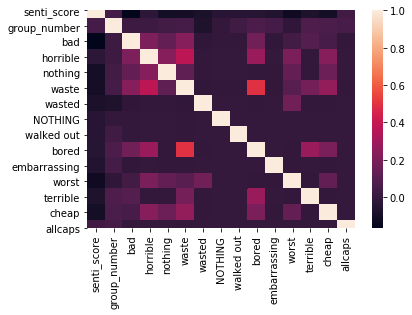

In [562]:
sns.heatmap(group4.corr())


In [564]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
#other classifiers
#MultinomialNB
#ComplementNB
#CategoricalNB 
#GaussianNB
from sklearn.naive_bayes import MultinomialNB 

# Instantiate our model and store it in a new variable.


multNnb4 = MultinomialNB()

# Fit our model to the data.
multNnb4.fit(data4, target4)

# Classify, storing the result in a new variable.
y_pred4 = multNnb4.predict(data4)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data4.shape[0],
    (target4 != y_pred4).sum()
))

Number of mislabeled points out of a total 623 points : 262


In [565]:
from sklearn.model_selection import cross_val_score
cross_val_score(multNnb, data, target, cv=10)

array([0.52380952, 0.55555556, 0.53968254, 0.6031746 , 0.61904762,
       0.55555556, 0.56451613, 0.55737705, 0.62295082, 0.59016393])

In [566]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[ 47, 259],
       [  3, 314]])

## 5th Classifier

In [583]:
#group 2 data 
group5 = pd.DataFrame(imbd_raw.loc[imbd_raw['group_number']!= 4])


bad_keywords5 = ['bad', 'horrible','awful','nothing','waste','aviod',
            'wasted', 'NOTHING','bored',
           'worst','terrible','cheap', ]

good_keywords5 = ['good', 'one', 'great', 'really', 'beautiful', 'pretty', 'performance',
             'love', 'nice', 'funny', 'terrific', 'enjoyed', 'interesting', 'art']

In [584]:
for key in bad_keywords5:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    group5[str(key)] = group5.review_text.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
    
for key in good_keywords5:
     # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    group5[str(key)] = group5.review_text.str.contains(
         ' ' + str(key) + ' ',
         case=True)
    
    
group5['allcaps'] = group5.review_text.str.isupper()
group5['senti_score'] = (group5['senti_score'] == 0)

data5 = group5[good_keywords5 + bad_keywords5 + ['allcaps']]
target5 = group5['senti_score']

group5.head()

,review_text,senti_score,group_number,bad,horrible,awful,nothing,waste,aviod,wasted,...,pretty,performance,love,nice,funny,terrific,enjoyed,interesting,art,allcaps
0,"A very, very, very slow-moving, aimless movie ...",True,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Not sure who was more lost - the flat characte...,True,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Attempting artiness with black & white and cle...,True,2,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Very little music or anything to speak of.,True,3,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,"The rest of the movie lacks art, charm, meanin...",True,5,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


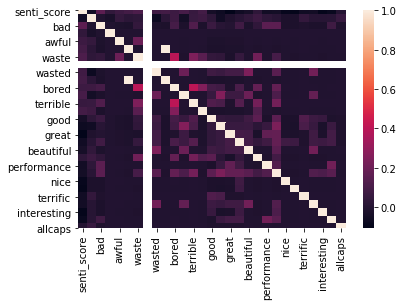

In [585]:
sns.heatmap(group5.corr())


In [589]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
#other classifiers
#MultinomialNB
#ComplementNB
#CategoricalNB 
#GaussianNB
from sklearn.naive_bayes import MultinomialNB 

# Instantiate our model and store it in a new variable.


multNnb5 = MultinomialNB()

# Fit our model to the data.
multNnb5.fit(data5, target5)

# Classify, storing the result in a new variable.
y_pred5 = multNnb5.predict(data5)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data5.shape[0],
    (target5 != y_pred5).sum()
))

Number of mislabeled points out of a total 624 points : 253


In [590]:
from sklearn.model_selection import cross_val_score
cross_val_score(multNnb5, data5, target5, cv=10)

array([0.52380952, 0.57142857, 0.55555556, 0.53968254, 0.62903226,
       0.56451613, 0.59677419, 0.58064516, 0.59677419, 0.69354839])

In [591]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target5, y_pred5)

array([[315,   5],
       [248,  56]])

Suprisingly this didn't seem to work all that well either!!